# Retroceso de Fase (Phase Kickback)

En esta página, cubriremos un comportamiento de compuertas cuánticas controladas conocido como "retroceso de fase" (phase kickback). Este interesante efecto cuántico es un bloque de construcción en muchos algoritmos cuánticos famosos, incluido el algoritmo de factorización de Shor y el algoritmo de búsqueda de Grover.

## Vectores propios

Ya deberías estar familiarizado con los vectores propios y los valores propios, pero si no, puedes leer una buena introducción [aquí](https://www.khanacademy.org/math/linear-algebra/alternate-bases/eigen-everything/v/linear-algebra-introduction-to-eigenvalues-and-eigenvectors) . Si *estás* familiarizado, entonces deberías reconocer la ecuación de vector propio:

$$ \class{_matrix-A}{A}\class{_eig-vec-A}{|x\rangle} = \class{_eig-val-A}{\lambda}\class{_eig-vec-A}{|x\rangle} $$

Esto es aún más simple en la computación cuántica. Dado que todos nuestros vectores de estado tienen una magnitud de 1, nuestros valores propios también deben tener una magnitud de 1, es decir, $\lambda = e^{2\pi i \theta}$. Entonces, para una compuerta cuántica $U$ y su estado propio $|x\rangle$, tenemos:

$$ \class{_matrix-U}{U}\class{_eig-vec-U}{|x\rangle} = \class{_eig-val-U}{e^{2\pi i \theta}}\class{_eig-vec-U}{|x\rangle} $$

Para resumir: si una compuerta gira (y solo gira) todas las amplitudes de un vector de estado en la misma cantidad, entonces ese estado es un *estado* propio de esa compuerta.

<!-- ::: q-block -->

### Explorando los vectores propios

Usa el widget a continuación para ver cómo una compuerta de un solo qubit transforma un estado de un solo qubit. ¿Puedes averiguar qué estados son propios y de qué compuertas?

```
q-eigenvector-widget
```

<!-- ::: -->

## Compuertas controladas y estados propios

Una vez que te sientas cómodo con el concepto de estados propios, podemos comenzar a pensar en lo que sucede cuando controlamos estos circuitos en el estado de otro qubit. Por ejemplo, sabemos que la compuerta Z que actúa sobre el estado $|1\rangle$ introduce una fase global negativa ($\theta = 0.5$), averigüemos qué sucede cuando controlamos esta operación.

<!-- ::: q-block.tabs -->

### La compuerta Z controlada

<!-- ::: tab -->

### |10〉

<!-- ::: column(width=200) -->

Si el qubit de control es $|0\rangle$, entonces el comportamiento es trivial, no pasa nada.

<!-- ::: column(width=400) -->

![diagrama de circuito que muestra un registro de dos qubits en el estado 01, accionado por una compuerta CZ. El estado no cambia](images/kickback/tabs/0/0.svg)

<!-- ::: -->

<!-- ::: tab -->

### |11〉

<!-- ::: column(width=200) -->

Si el qubit de control es $|1\rangle$, la compuerta introduce una fase global (observa el signo menos en la imagen de la derecha), pero los estados del qubit no cambian.

<!-- ::: column(width=400) -->

![diagrama de circuito que muestra un registro de dos qubits en el estado 01, accionado por una compuerta CZ. El estado no cambia](images/kickback/tabs/0/1.svg)

<!-- ::: -->

<!-- ::: tab -->

### |1+〉

<!-- ::: column(width=200) -->

La compuerta Z controlada no hace nada cuando el control es $|0\rangle$, e introduce una fase negativa cuando el control es $|1\rangle$. Cuando el qubit de control está en superposición, la compuerta cambia la fase *relativa* entre los estados $|0\rangle$ y $|1\rangle$ del qubit de control.

<!-- ::: column(width=400) -->

![diagrama de circuito que muestra un registro de dos qubits en el estado 01, accionado por una compuerta CZ. El estado no cambia](images/kickback/tabs/0/2.svg)

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

Cuando el control es $|{+}\rangle$, y el objetivo es $|1\rangle$, la compuerta Z controlada cambia el estado del qubit de *control* , pero deja el qubit objetivo sin cambios. Este efecto se denomina "retroceso de fase" (phase kickback), ya que el valor propio regresa al estado del qubit de control.

En términos más generales, si tenemos una compuerta cuántica $U$ y su estado propio $|x\rangle$, entonces $U$ actuando sobre $|x\rangle$ agregará una fase global $\theta$ como vimos anteriormente.

$$ \class{_matrix-U}{U}\class{_eig-vec-U}{|x\rangle} = \class{_eig-val-U}{e^{2\pi i \theta}}\class{_eig-vec-U}{|x\rangle} $$

Si controlamos la operación $U|x\rangle$ por otro qubit en una superposición de $|0\rangle$ y $|1\rangle$, entonces esto tendrá el efecto de rotar el qubit de control alrededor del eje Z por un ángulo $\theta$. Es decir:

$$ \class{_matrix-CU}{CU}\class{_eig-vec-U}{|x\rangle}\class{_control-qubit-pre}{(\alpha|0\rangle + \beta|1\rangle)} = \class{_eig-vec-U}{|x\rangle}\class{_control-qubit-post}{(\alpha|0\rangle + \beta e^{2\pi i \theta}|1\rangle)} $$

En el ejemplo anterior, vemos que el 'control' de la compuerta Z controlada en realidad está haciendo una rotación en Z; algo que solo debería haber estado observando el qubit que ha cambiado. Por esta razón, a menudo verás la compuerta Z controlada dibujada como dos controles.

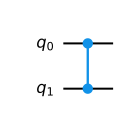

In [1]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.cz(0,1)
qc.draw()

## La Compuerta CNOT

Veamos el efecto de retroceso de fase con una compuerta diferente de dos qubits. Dado que el estado $|{-}\rangle$ es un estado propio de la compuerta X, con valor propio $-1$, obtenemos:

$$ \class{_matrix-CX}{CX}\class{_eig-vec-X}{|{-}\rangle}\class{_control-qubit-pre}{(\alpha|0\rangle + \beta|1\rangle)} = \class{_eig-vec-X}{|{-}\rangle}\class{_control-qubit-post}{(\alpha|0\rangle - \beta |1\rangle)} $$

![](images/kickback/cnot-kickback.svg)

Nuevamente, en este caso el cambio de fase es $\theta = 0.5$, por lo que nuestro qubit de control se voltea alrededor del eje Z.

<!-- ::: q-block -->

### Ejemplo resuelto

<details>
    <summary>Retroceso con la compuerta CNOT (haz clic para expander)</summary>

    q-carousel
        div.md
            <img src="images/kickback/carousel/cnot/carousel-img-0.svg"><br>Por definición, la compuerta X controlada (CNOT) cambia el estado del qubit objetivo (en nuestro ejemplo, el bit más a la derecha es el objetivo) si el qubit de control es $|1\rangle$. En la imagen de arriba, mostramos la compuerta CNOT transformando un vector de estado a otro.
        div.md
            <img src="images/kickback/carousel/cnot/carousel-img-1.svg"><br>Por ejemplo, si el qubit de control está en el estado $|0\rangle$, siempre obtenemos exactamente el mismo vector de estado. En la imagen de arriba, las amplitudes de los estados donde el control es $|1\rangle$ son cero, por lo que no vemos ningún efecto cuando los intercambiamos.
        div.md
            <img src="images/kickback/carousel/cnot/carousel-img-2.svg"><br>Otro ejemplo: si el qubit de control está en el estado $|1\rangle$, entonces usamos una compuerta X en el qubit objetivo. En este caso, el qubit objetivo está en un estado propio de la compuerta X, por lo que obtenemos el mismo vector de estado, hasta la fase global. Este cambio es una fase global, ya que la fase relativa entre las amplitudes $|0\rangle$ y $|1\rangle$ del qubit objetivo permaneció igual.
        div.md
            <img src="images/kickback/carousel/cnot/carousel-img-3.svg"><br>Veamos el vector de estado cuando el control está en el estado $|{+}\rangle$ (es decir, $\tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$), y el objetivo en el estado $|{-}\rangle$ (es decir, $\tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$). Podemos ver que estos dos qubits son separables, ya que medir uno no afecta el estado del otro.
        div.md
            <img src="images/kickback/carousel/cnot/carousel-img-4.svg"><br> Por ejemplo, independientemente de si medimos el qubit de control como $|0\rangle$ o $|1\rangle$, las amplitudes para medir el objetivo como $|0\rangle$ o $|1\rangle$ permanecen iguales.
        div.md
            <img src="images/kickback/carousel/cnot/carousel-img-5.svg"><br>Con todo esto en mente, veamos qué sucede cuando aplicamos el CNOT a este estado $|{+}{-}\rangle$.
        div.md
            <img src="images/kickback/carousel/cnot/carousel-img-6.svg"><br>Después del CNOT, estos qubits siguen siendo separables, ya que el estado de uno no cambia cuando medimos el otro. Sin embargo, la fase relativa entre las amplitudes $|0\rangle$ y $|1\rangle$ del qubit de control ha cambiado.
    
</details>

<!-- ::: -->

Cuando recordamos que la compuerta H hace la transformación $|0\rangle \rightarrow |{+}\rangle$ y $|1\rangle \rightarrow |{-}\rangle$ (y viceversa), obtenemos lo siguiente identidad:

![](images/kickback/cnot-identity.svg)

## El problema de Deutsch

Acabamos de ver que condicionar una acción en el estado de un qubit en realidad puede cambiar el estado del qubit de control. Este es un efecto 'cuántico', es decir, algo que no vemos que suceda con los bits clásicos.

En la computación cuántica, queremos crear algoritmos que las computadoras clásicas *no puedan* ejecutar, por lo que un buen lugar para comenzar es tratar de replantear este efecto como un problema a resolver. De esta manera, podemos probar que las computadoras cuánticas son al menos un poco mejores en algo que las computadoras clásicas.

El problema de Deutsch hace exactamente esto. Este es un problema de 'caja negra'; un problema artificial en el que se nos permite aplicar una función a nuestros bits, pero no podemos ver cómo opera la función. El desafío es descubrir algunas propiedades de la caja probando diferentes entradas y salidas.

El problema de Deutsch es el siguiente: tenemos una función reversible clásica (a la que llamaremos $f$ de forma abreviada), que actúa sobre dos bits, $ a $ y $ b $. La función dejará el bit $ a $ solo, pero puede o no cambiar el bit $ b $. El problema de Deutsch nos pide que averigüemos si $f$ se comporta de manera diferente dependiendo del valor de $ a $ (lo llamaremos comportamiento "balanceado"), o si ignora a $ a $ y siempre hace lo mismo con $ b $ (comportamiento "constante"). El desafío es hacer esto aplicando $f$ la menor cantidad de veces posible.

![Imagen del problema de Deutsch como un circuito cuántico. El circuito tiene dos bits, los cables superior e inferior etiquetados como 'a' y 'b' respectivamente. Luego, ambos bits son activados por una compuerta opaca de dos bits etiquetada como 'f'. Después de 'f', el qubit superior todavía tiene la etiqueta 'f', pero el qubit inferior ahora tiene la etiqueta 'f (a, b)'.](images/kickback/deutsch-problem.svg)

El mejor algoritmo clásico para este problema aplica $f$ dos veces con diferentes valores de $ a $, luego observa si $f$ se comportó de manera diferente.

## Algoritmo de Deutsch

Como habrás adivinado, podemos usar el retroceso de fase (phase kickback) para crear un algoritmo cuántico que funciona incluso mejor que el algoritmo clásico. Si ponemos el qubit $ a $ en el estado $|{+}\rangle$ y el qubit $ b $ en el estado $|{-}\rangle$, entonces cualquier cambio condicionado a $ a $ devolverá una fase negativa relativa, volteando al qubit $ a $ de $|{+}\rangle$ a $|{-}\rangle$. Luego podemos aplicar una compuerta H a $ a $ para ver si se produjo un retroceso de fase o no.

![Imagen del algoritmo de Deutsch como circuito cuántico.](images/kickback/deutsch-algorithm.svg)

<!-- ::: q-block.reminder -->

### Más información

<details><summary>Dentro de la caja negra (haz clic para ampliar)</summary> Si esto todavía parece mágico, puede ayudar pensar en todas las posibles funciones de Deutsch y los circuitos cuánticos que las implementan. Hay cuatro posibles funciones de Deutsch: dos constantes y dos balanceadas.</details>

Si es constante, la función puede no hacer nada o voltear el qubit $ b $. Si está balanceada, la función puede voltear a $ b $ solo cuando $ a $ es $|1\rangle$, o voltear a $ b $ solo cuando $ a $ es $|0\rangle$. Puedes ver los cuatro escenarios en la imagen a continuación.

<img src="images/kickback/deutsch-oracles.svg">

Con ambas funciones constantes, el qubit superior permanecerá sin cambios (ya que no le estamos haciendo nada), y con las funciones equilibradas, el efecto de retroceso cambia el qubit superior de $|{+}\rangle$ a $|{- }\rangle$.




<!-- ::: -->

Este no es el ejemplo más impresionante de aceleración cuántica; es muy específico y no encontramos problemas de caja negra en la naturaleza. En cambio, el problema de Deutsch nos da un resultado alentador y algunos efectos interesantes para ser explorados. En el resto de este curso, ampliaremos este sencillo experimento para resolver problemas aún más impresionantes, incluida la factorización.

<!-- ::: q-block.exercise -->

### Ejercicio

Haz una función, `deutsch()` que tome una función Deutsch como `QuantumCircuit` y use el algoritmo Deutsch para resolverlo en un simulador cuántico. Tu función debe devolver `True` si la función Deutsch está balanceada y `False` si es constante.

Puedes usar la función `deutsch_problem()` para crear un `QuantumCircuit` que puedes usar como entrada para tu función `deutsch()`.

<!-- ::: -->

In [ ]:
from qiskit import QuantumCircuit
import numpy as np

def deutsch_problem(seed=None):
    """Devuelve un circuito que realiza la función del 
    problema de Deutsch.
    Args:
        seed (int): Si se establece, el circuito devuelto 
            siempre será el mismo para la misma semilla.
    Returns: QuantumCircuit
    """
    np.random.seed(seed)
    problem = QuantumCircuit(2)
    if np.random.randint(2):
        print("La función es balanceada.")
        problem.cx(0, 1)
    else:
        print("La función es constante.")
    if np.random.randint(2):
        problem.x(1)
    return problem

In [ ]:
def deutsch(function):
    """Implementa el algoritmo de Deutsch.

    Args:
        function (QuantumCircuit): Función Deutsch a ser resuelta.
            Debe ser un circuito de 2 qubits ya sea balanceado
            o constante.
    Returns:
        bool: True si el circuito está balanceado, 
            de lo contrario False.
    """

    # tu código aquí

## Resumen

En esta página revisamos:

- recapitulación del concepto de valores y vectores propios
- exploración del efecto de retroceso de fase (phase kickback) y revisión de algunos ejemplos específicos
- se introdujo el problema de Deutsch como un escenario donde las computadoras cuánticas tienen una ventaja sobre las computadoras clásicas

Si olvidas todo lo demás de esta página, lo más importante que debes recordar y sentirte cómodo es este resumen de retroceso de fase a continuación:

<!-- ::: q-block.reminder -->

### Recordatorio: Retroceso de fase (Phase kickback)

Si tenemos una compuerta cuántica $U$ y su estado propio $|x\rangle$, entonces $U$ actuando sobre $|x\rangle$ agregará una fase global $\theta$. Es decir:

$$ \class{_matrix-U}{U}\class{_eig-vec-U}{|x\rangle} = \class{_eig-val-U}{e^{2\pi i \theta}}\class{_eig-vec-U}{|x\rangle} $$

Si controlamos la operación $U|x\rangle$ por otro qubit en una superposición de $|0\rangle$ y $|1\rangle$, entonces esto tendrá el efecto de rotar el qubit de control alrededor del eje Z por un ángulo $\theta$. Es decir:

$$ \class{_matrix-CU}{CU}\class{_eig-vec-U}{|x\rangle}\class{_control-qubit-pre}{(\alpha|0\rangle + \beta|1\rangle)} = \class{_eig-vec-U}{|x\rangle}\class{_control-qubit-post}{(\alpha|0\rangle + \beta e^{2\pi i \theta}|1\rangle)} $$

<!-- ::: -->